<a href="https://colab.research.google.com/github/ZeusKwon/CSAI_assignment/blob/main/n214a_logistic_regression_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 2 / SPRINT 1 / NOTE 4*

# 📝 Assignment
---

### 1)

In [1]:
import pandas as pd
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/cardio/cardio_train.csv', sep=';')

In [2]:
# id칼럼 drop
df = df.drop('id', axis = 1)
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [3]:
# 결측값 확인 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


In [4]:
df.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


### 2)

In [5]:
from sklearn.model_selection import train_test_split

# 훈련 / 테스트 세트로 나누기
train, test = train_test_split(df,train_size = 0.8, random_state=2)
print("train shape:", train.shape)
print("validation shape", test.shape)

train shape: (55980, 12)
validation shape (13996, 12)


In [6]:
from sklearn.model_selection import train_test_split

# 훈련 / 검증 세트로 나누기
train, val = train_test_split(train,train_size = 0.8, random_state=2)
print("train shape:", train.shape)
print("validation shape", val.shape)

train shape: (44784, 12)
validation shape (11196, 12)


In [7]:
# 타겟 발류 분리
target = 'cardio'
y_train = train['cardio']
y_test = test['cardio']
y_val = val['cardio']

X_train = train.drop(columns='cardio')
X_test = test.drop(columns='cardio')
X_val = val.drop(columns='cardio')

In [8]:
len(X_val)

11196

### 3)


In [9]:
# 기준모델을 만들 빈도확인
y_train.value_counts(normalize=True)

1    0.501697
0    0.498303
Name: cardio, dtype: float64

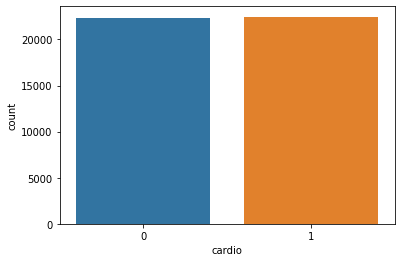

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.countplot(x=y_train);

In [11]:
# 최다 클래스의 빈도가 정확도가 됩니다.
from sklearn.metrics import accuracy_score

# mode(): Return the highest frequency value in a Series.
major = y_train.mode()[0]

# 타겟 샘플 수 만큼 0이 담긴 리스트를 만듭니다. 기준모델로 예측
y_pred = [major] * len(y_train)

print("training accuracy: ", accuracy_score(y_train, y_pred))

training accuracy:  0.501697034655234


In [12]:
# 훈련데이터의 기준모델로 검증세트에서의 정확도 확인
y_val = val[target]
y_pred = [major] * len(y_val)
print("validation accuracy: ", accuracy_score(y_val, y_pred))

validation accuracy:  0.49821364773133264


In [13]:
# 훈련데이터의 기준모델로 테스트세트에서의 정확도 확인
y_test = test[target]
y_pred = [major] * len(y_test)
print("test accuracy: ", accuracy_score(y_test, y_pred))

test accuracy:  0.4948556730494427


In [14]:
from sklearn.linear_model import LogisticRegression

# 학습
logistic = LogisticRegression(max_iter=1000)
logistic.fit(X_train, y_train)

# score - 분류 정확도
print('검증세트 정확도', logistic.score(X_val, y_val))

검증세트 정확도 0.7073061807788495


### 4) 

In [ ]:
!pip install category_encoders;

In [15]:
## 전체 데이터셋을 넣고 특정 category 지정 후에 학습 가능
from category_encoders import OneHotEncoder
encoder = OneHotEncoder(cols='gender' ,use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)
X_train_encoded.head(3)


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,age,gender_1.0,gender_2.0,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
221,17591,1,0,157,70.0,160,100,3,1,0,0,0
59211,19677,0,1,174,80.0,150,80,1,1,0,0,1
26654,23504,1,0,158,76.0,140,90,3,3,0,0,1


In [16]:
X_val_encoded.head(3)

,age,gender_1.0,gender_2.0,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
36174,20787,1,0,168,67.0,120,80,3,3,0,0,1
4101,20578,0,1,176,80.0,160,80,1,1,1,1,1
19924,18368,0,1,174,78.0,120,80,2,1,0,0,1


In [17]:
from sklearn.linear_model import LogisticRegression

# 학습
logistic = LogisticRegression(max_iter=1000)
logistic.fit(X_train_encoded, y_train)

# score - 분류 정확도
print('검증세트 정확도', logistic.score(X_val_encoded, y_val))

검증세트 정확도 0.6944444444444444


### 5) 

In [18]:
from category_encoders import OneHotEncoder
encoder = OneHotEncoder(cols='gender' ,use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [19]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_encoded)
X_test_imputed = imputer.transform(X_test_encoded)

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

In [21]:
from sklearn.linear_model import LogisticRegression

# 학습
logistic = LogisticRegression(max_iter=1000)
logistic.fit(X_train_scaled, y_train)

# score - 분류 정확도
print('테스트세트 정확도', logistic.score(X_test_scaled, y_test))

테스트세트 정확도 0.7264218348099457


In [22]:
# grade를 원핫인코딩 하지 않고 test스코어 확인!(개인적인 궁금증)

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

In [24]:
from sklearn.linear_model import LogisticRegression

# 학습
logistic = LogisticRegression(max_iter=1000)
logistic.fit(X_train_scaled, y_train)

# score - 분류 정확도
print('테스트세트 정확도', logistic.score(X_test_scaled, y_test)) # 같게 나오는구나

테스트세트 정확도 0.7264218348099457


In [25]:
# 학습데이터 train+val로 학습
from sklearn.model_selection import train_test_split

train, test = train_test_split(df,train_size = 0.8, random_state=2)
# train, val = train_test_split(train,train_size = 0.8, random_state=2)


In [26]:
# 타겟 발류 분리
target = 'cardio'
y_train = train['cardio']
y_test = test['cardio']
y_val = val['cardio']

X_train = train.drop(columns='cardio')
X_test = test.drop(columns='cardio')
X_val = val.drop(columns='cardio')

In [27]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

In [28]:
from sklearn.linear_model import LogisticRegression

# 학습
logistic = LogisticRegression(max_iter=1000)
logistic.fit(X_train_scaled, y_train)

# score - 분류 정확도
print('테스트세트 정확도', logistic.score(X_test_scaled, y_test)) # 더 높게 나옴

테스트세트 정확도 0.7284224064018291


## 🔥 

### 6)


In [ ]:
import pandas as pd
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/cardio/cardio_train.csv', sep=';')

In [ ]:
# id칼럼 drop
df = df.drop('id', axis = 1)

In [ ]:
# 중복값 제거
df.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)

In [ ]:
corr = df.corr(method = 'pearson')
corr['cardio']

age            0.238189
gender         0.008037
height        -0.010871
weight         0.181599
ap_hi          0.054475
ap_lo          0.065717
cholesterol    0.221119
gluc           0.089268
smoke         -0.015533
alco          -0.007366
active        -0.035666
cardio         1.000000
Name: cardio, dtype: float64

In [ ]:
df['cardio'].value_counts(normalize=True)

0    0.500229
1    0.499771
Name: cardio, dtype: float64

1일 때 심혈관 질환이 있고, 0일 때 심혈관 질환이 없다.

심혈관 질환의 위험인자로는 고혈압, 흡연, 고콜레스테롤을 꼽을 수 있다고 한다.

콜레스테롤(cholesterol) 수치가 높으면 동맥경화 ,심근경색, 돌연사와 같은 심혈관질환으로 이어져 심하면 사망에 이를 수도 있다고 한다.

glucose 수치가 높다는 것은 혈액 속의 포도당 수치가 정상보다 높은 상태를 말하며, 당뇨병임을 의미한다. 당뇨병으로 고혈당이 오래 지속되면 장기에 합병증이 올 수 있다. 심장동맥질환, 뇌혈관질환 등 합병증이 생길 수 있다.

gluc, cholesterol의 경우 1: normal, 2: above normal, 3: well above normal 이기 때문에 순위형 자료에 속한다.

In [ ]:
# 콜레스테롤 자료 분포
df['cholesterol'].value_counts(normalize=True)

1    0.748271
2    0.136461
3    0.115268
Name: cholesterol, dtype: float64

In [ ]:
df['gluc'].value_counts(normalize=True)

1    0.849648
3    0.076183
2    0.074168
Name: gluc, dtype: float64


콜레스테롤과 혈중 포도당의 경우, 정상 환자 비율이 더 높다.

age는 in days로 되어있다. 365로 나눈 후, 정수형으로 변환해주겠다.

In [ ]:
# feather engineering 나이 데이터 수정
df['age']=(df['age']/365).astype(int) + 1 
# bmi지수 생성
df["bmi"] = df["weight"]/ (df["height"]/100)**2

In [ ]:
df.dtypes

age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
bmi            float64
dtype: object

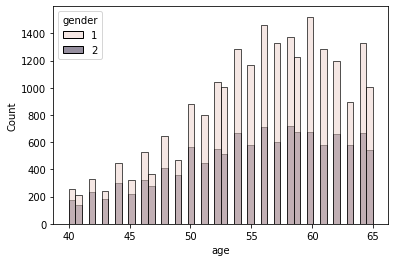

In [ ]:
# 심혈관 질환이 있는 사람들만 보기
is_cardio = df[df.cardio==1]
sns.histplot(is_cardio, x='age', hue='gender');

In [ ]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
count,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000
mean,53.840874,1.349648,164.359152,74.208519,128.820453,96.636261,1.366997,1.226535,0.088159,0.053790,0.803718,0.499771,27.557610
std,6.767103,0.476862,8.211218,14.397211,154.037729,188.504581,0.680333,0.572353,0.283528,0.225604,0.397187,0.500004,6.092210
min,30.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.471784
25%,49.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.391837
75%,59.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.222222
max,65.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,298.666667


- 통계 테이블을 확인하니 "age", "height", "weight", "ap_hi", "ap_lo"의 열이 outlier가 있을것 같음
- standartize를 먼저 실행


In [ ]:
s_list = ["age", "height", "weight", "ap_hi", "ap_lo"]
def standartization(x):
    x_std = x.copy(deep=True)
    for column in s_list:
        x_std[column] = (x_std[column]-x_std[column].mean())/x_std[column].std()
    return x_std 
df_std=standartization(df)
df_std.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,-0.419807,2,0.443399,-0.847978,-0.122181,-0.088254,1,1,0,0,1,0,21.967120
1,0.319062,1,-1.018016,0.749554,0.072577,-0.035205,3,1,0,0,1,1,34.927679
2,-0.272033,1,0.078045,-0.709062,0.007658,-0.141303,3,1,0,0,0,1,23.507805
3,-0.715354,2,0.565184,0.541180,0.137496,0.017844,1,1,0,0,1,1,28.710479
4,-0.863128,1,-1.018016,-1.264725,-0.187100,-0.194352,1,1,0,0,0,0,23.011177


In [ ]:
# 그래프 출력을 위한 재구조화
df_melted = pd.melt(frame=df_std, id_vars="cardio", value_vars=s_list, var_name="features", value_name="value", col_level=None)
df_melted

,cardio,features,value
0,0,age,-0.419807
1,1,age,0.319062
2,1,age,-0.272033
3,1,age,-0.715354
4,0,age,-0.863128
...,...,...,...
349875,0,ap_lo,-0.088254
349876,1,ap_lo,-0.035205
349877,1,ap_lo,-0.035205
349878,1,ap_lo,-0.088254


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

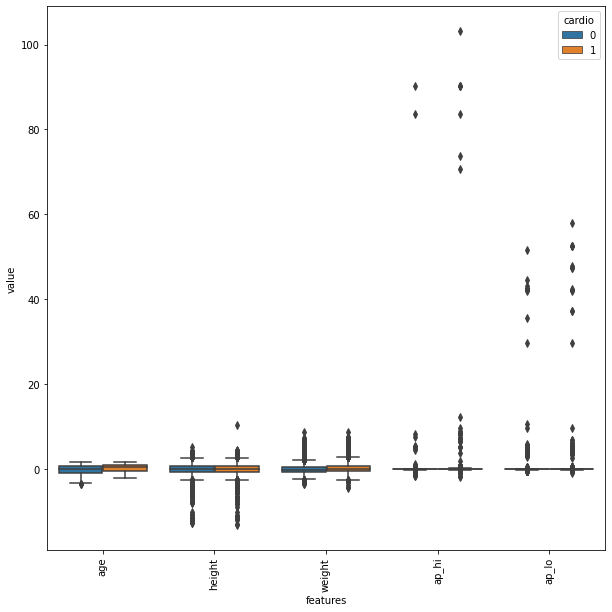

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="cardio", data=df_melted);
plt.xticks(rotation=90)

In [ ]:
ap_list = ["ap_hi", "ap_lo"]
boundary = pd.DataFrame(index=["lower_bound","upper_bound"]) # We created an empty dataframe
for each in ap_list:
    Q1 = df[each].quantile(0.25)
    Q3 = df[each].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1- 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    boundary[each] = [lower_bound, upper_bound ]

ap_hi_filter = (df["ap_hi"] > boundary["ap_hi"][1])
ap_lo_filter = (df["ap_lo"] > boundary["ap_lo"][1])                                                           
outlier_filter = (ap_hi_filter | ap_lo_filter)
x_outliers = df[outlier_filter]
x_outliers["cardio"].value_counts()

1    2025
0     388
Name: cardio, dtype: int64

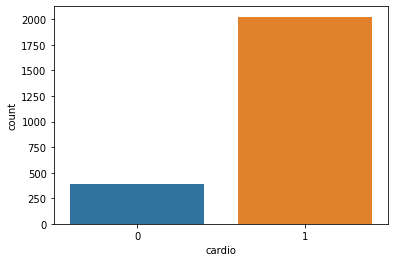

In [ ]:
sns.countplot(x='cardio',data=x_outliers,linewidth=2)

- 심혈관 질환은 ap_hi 및 ap_lo outlier 데이터의 83 %에 존재한다.
- ap_hi와 ap_lo는 고혈압을 상징하기 때문에 높은 질병률은 실생활과 일치한다.
- 이상치는 drop한다.

In [ ]:
# 이상치 제거
out_filter = ((df["ap_hi"]>250) | (df["ap_lo"]>200) )
df = df[~out_filter]

In [ ]:
df.shape

(68983, 13)

### 훈련데이터와 테스트 데이터를 나눠서 활용

In [ ]:
from sklearn.model_selection import train_test_split

# 훈련 / 테스트 세트로 나누기
train, test = train_test_split(df,train_size = 0.8, random_state=2)
print("train shape:", train.shape)
print("test shape", test.shape)

train shape: (55186, 13)
test shape (13797, 13)


In [ ]:
# 타겟 발류 분리
target = 'cardio'
y_train = train['cardio']
y_test = test['cardio']

X_train = train.drop(columns='cardio')
X_test = test.drop(columns='cardio')

### feature scaling를 사용해서 Normalization를 실행
- 기존 변수에 범위를 정규 분포로 변환한다.
- 데이터의 최소값, 최대값을 알고 있을 경우 사용한다.
위와 같은 경우 사용한다.  
사실 어떤걸 써야할지 모르겟다... 그래서 둘다 해봄

In [ ]:
from sklearn.preprocessing import normalize
x_train_nor = normalize(X_train)
x_test_nor = normalize(X_test)
x = normalize(df)

In [ ]:
from sklearn.linear_model import LogisticRegression

# 학습
logistic = LogisticRegression(max_iter=1000)
logistic.fit(x_train_nor, y_train)

# score - 분류 정확도
print('테스트세트 정확도', logistic.score(x_test_nor, y_test)) # 더 높게 나옴

테스트세트 정확도 0.7203739943465971


# 결과 
- 검증세트 정확도 0.7203739943465971

### feature scaling를 사용해서 StandardScaler를 실행
- 기존 변수에 범위를 정규 분포로 변환한다.
- 데이터의 최소값, 최대값을 모를 경우 사용한다.
위와 같은 경우 사용한다.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

# 학습
logistic = LogisticRegression(max_iter=1000)
logistic.fit(X_train_scaled, y_train)

# score - 분류 정확도
print('테스트세트 정확도', logistic.score(X_test_scaled, y_test))

검증세트 정확도 0.7289265782416467


# 결과 
- 테스트세트 정확도 0.7284224064018291
- 이후 테스트세트 정확도 0.7289265782416467  
EDA(특성공학, 이상치 제거) 튜닝작업 후 정확도가 오른것을 볼 수 있음.